# Copy of Pres1 With Naive Trend Estimation

## 1. Outline
I examine the 12-month change in nominal WTI returns in response to economic, geopolticial and financial uncertainties, and how responses have changed over time. Since uncertainty spikes when major instabilities occur, we can thus use uncertainty as a proxy to deduce the impact of historical events on oil prices, especially when a time series of datapoints are obtained. For this study, I demonstrate how we can use an established economometrics method to estimate the average effect of uncertainty on crude returns for the sample period, before decomposing the average effect into annual datapoints.

To obtain continuous and non-proprietary measures for uncertainty, I look at established indices that approximate uncertainty: namely the Economic Policy Uncertainty Index (EPU), Geopolitical Risk Index (GPR), and CBOE Volatility Index (VIX). Shock values are defined as the difference between % changes in the index and the 12-month rolling average. I believe this construction of shock values should be robust up to a 6 month rolling average (more testing needed).

Consistent with Kilian (2008) and Kilian & Hicks (2013), I use a (non-autoregressive) distributed lag model to estimate the average effect of shocks in uncertainty over a period of 12 months. In doing so, I recognize underlying assumptions that a) shocks are predetermined, and b) shocks can be readily observed. 

Adding to the distributed lag methodology, I create a trend estimation method to obtain more granular, annual values of model coefficients. Using my method, I examine changes in the estimated annual values before checking that my method of obtaining annual coefficients provide reasonable results.

## 2. Model

### 2.1 General Model*
For the following let $WTI$ be the nominal price of WTI crude, $S$ be the shock variable and $I$ the value of the the index used. Our general model is given by:

$\Delta{WTI}_t = \alpha + \sum_{p=0}^{12} \beta_p S_{t-p} + \epsilon_t$

where

$S_t = \Delta{I_t} - \Delta{(\frac{1}{12}\sum_{j=0}^{11} I_{t-j})}$

The average magnitude of WTI response at month p after the shock is thus given by $\beta_p$.

\* Adapted from Kilian, L. (2008). A Comparison of the Effects of Exogenous Oil Supply Shocks on Output and Inflation in the G7 Countries. *Journal of the European Economic Association*, 6(1), pp 78-121.

### 2.2 Trend Estimation
To prove that Pres1 has the better model for trend estimation, I will use a naive regression method where I'll just run a regression with a sample size of 13 each year.

## 3. Data
WTI data is sourced from EIA, while the EPU and GPR indices were sourced from the respective authors and VIX monthly adjusted closing values from Yahoo Finance.

In [1]:
from utils import *
env()

--------- Dependencies ---------
python: 3.8.10 | packaged by conda-forge | (default, May 11 2021, 06:25:23) [MSC v.1916 64 bit (AMD64)]
numpy: 1.21.0
pandas: 1.2.4
matplotlib: 3.4.2
statsmodels: 0.13.0


In [2]:
wti = load('data/WTI.csv').pct_change().dropna()
spot = clean_series('spot', wti)
c1 = clean_series('contract_1', wti)
c3 = clean_series('contract_3', wti)

### 3.1 EPU

In [3]:
epu = load('data/EPUGlobal.csv')
epu_shock = calc_shock('GEPU_current', epu)

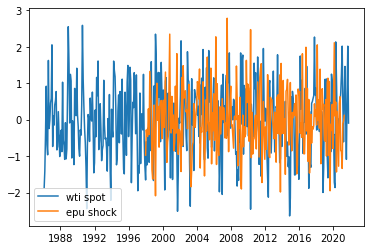

In [4]:
plt.plot(spot, label='wti spot')
plt.plot(epu_shock, label='epu shock')
plt.legend()

*Note that all time series data are standardized annually and seasonally adjusted by month.*

In [5]:
model1 = dl('spot', 'GEPU_current', spot.join(epu_shock))
model2 = dl('contract_1', 'GEPU_current', c1.join(epu_shock))
model3 = dl('contract_3', 'GEPU_current', c3.join(epu_shock))

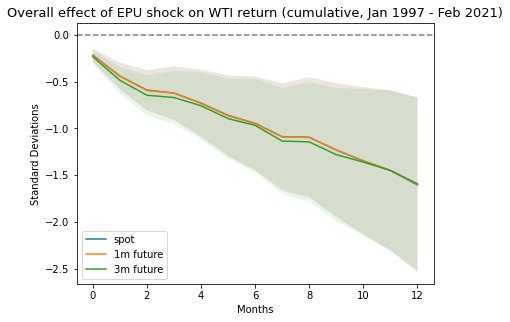

In [6]:
draw((model1, model2, model3), labels=('spot', '1m future', '3m future'), cumulative=True)
plt.title('Overall effect of EPU shock on WTI return (cumulative, Jan 1997 - Feb 2021)', fontsize=13)
plt.ylabel('Standard Deviations')
plt.xlabel('Months')
plt.show()

This is the cumulative shock response at months 0 to 12 after the shock occurs with 1 standard error bands. Due to the transformations done on the time series to ensure an unbiased fit, the proper interpretation is that (ceteris paribus) a 1 standard deviation increase in the shock variable (change in EPU relative to the 12-month rolling average) corresponds to a total -1.5 standard deviation decrease in WTI returns over 12 months.

*Note that standard deviations are computed annually (see annotation above for time series data).*

In [7]:
spot_shift1 = time_shift_naive('spot', 'GEPU_current', spot.join(epu_shock), start_yr=2000, end_yr=2018)
c1_shift1 = time_shift_naive('contract_1', 'GEPU_current', c1.join(epu_shock), start_yr=2000, end_yr=2018)
c3_shift1 = time_shift_naive('contract_3', 'GEPU_current', c3.join(epu_shock), start_yr=2000, end_yr=2018)

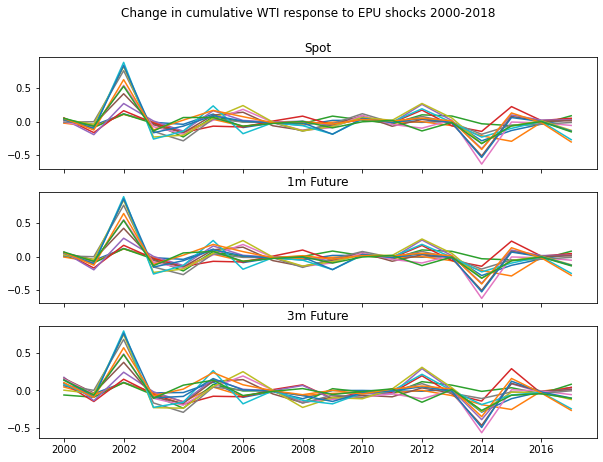

In [8]:
fig, axs = plt.subplots(3, sharex=True, figsize=(10,7))
fig.suptitle('Change in cumulative WTI response to EPU shocks 2000-2018')
axs[0].plot(spot_shift1)
axs[0].set_title('Spot')
axs[1].plot(c1_shift1)
axs[1].set_title('1m Future')
axs[2].plot(c3_shift1)
axs[2].set_title('3m Future')
plt.show()

### 3.2 GPR

In [9]:
gpr = load('data/GPRGlobal.csv')
gpr_shock = calc_shock('GPRI', gpr)

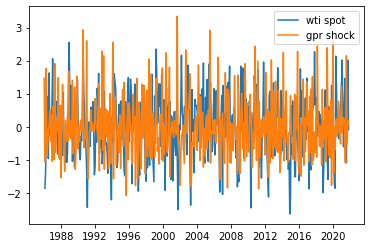

In [10]:
plt.plot(spot, label='wti spot')
plt.plot(gpr_shock, label='gpr shock')
plt.legend()

In [11]:
model4 = dl('spot', 'GPRI', spot.join(gpr_shock))
model5 = dl('contract_1', 'GPRI', c1.join(gpr_shock))
model6 = dl('contract_3', 'GPRI', c3.join(gpr_shock))

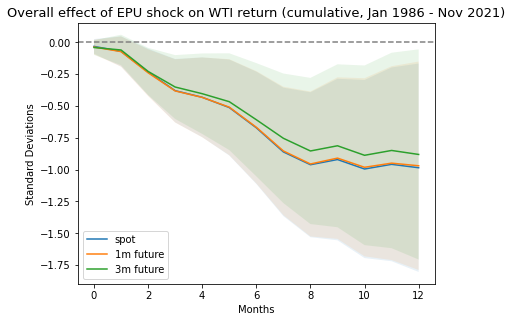

In [12]:
draw((model4, model5, model6), labels=('spot', '1m future', '3m future'), cumulative=True)
plt.title('Overall effect of EPU shock on WTI return (cumulative, Jan 1986 - Nov 2021)', fontsize=13)
plt.ylabel('Standard Deviations')
plt.xlabel('Months')
plt.show()

Here we see that on average, a 1 standard deviation in GPR shock corresponds to a total -1 standard deviation in WTI returns in the next 12 months.

In [13]:
spot_shift2 = time_shift_naive('spot', 'GPRI', spot.join(gpr_shock), start_yr=1989, end_yr=2019)
c1_shift2 = time_shift_naive('contract_1', 'GPRI', c1.join(gpr_shock), start_yr=1989, end_yr=2019)
c3_shift2 = time_shift_naive('contract_3', 'GPRI', c3.join(gpr_shock), start_yr=1989, end_yr=2019)

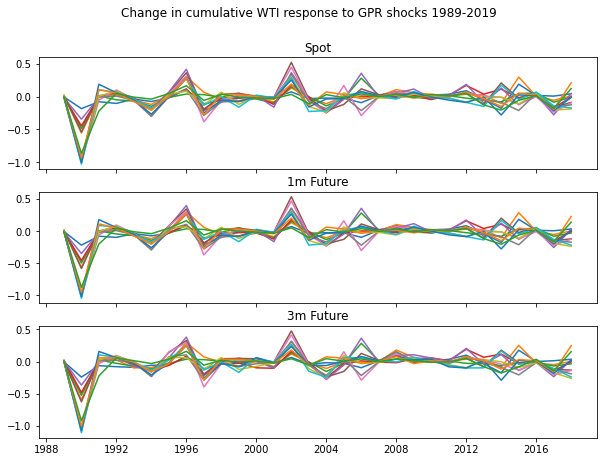

In [14]:
fig, axs = plt.subplots(3, sharex=True, figsize=(10,7))
fig.suptitle('Change in cumulative WTI response to GPR shocks 1989-2019')
axs[0].plot(spot_shift2)
axs[0].set_title('Spot')
axs[1].plot(c1_shift2)
axs[1].set_title('1m Future')
axs[2].plot(c3_shift2)
axs[2].set_title('3m Future')
plt.show()

### 3.3 VIX

In [15]:
vix = load('data/VIX.csv')
vix_shock = calc_shock('VIX', vix)

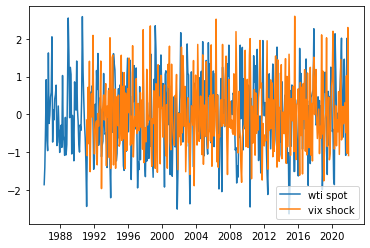

In [16]:
plt.plot(spot, label='wti spot')
plt.plot(vix_shock, label='vix shock')
plt.legend()

In [17]:
model7 = dl('spot', 'VIX', spot.join(vix_shock))
model8 = dl('contract_1', 'VIX', c1.join(vix_shock))
model9 = dl('contract_3', 'VIX', c3.join(vix_shock))

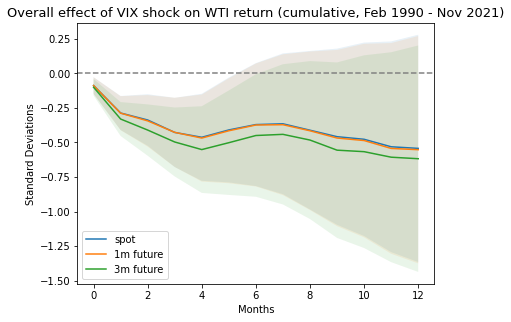

In [18]:
draw((model7, model8, model9), labels=('spot', '1m future', '3m future'), cumulative=True)
plt.title('Overall effect of VIX shock on WTI return (cumulative, Feb 1990 - Nov 2021)', fontsize=13)
plt.ylabel('Standard Deviations')
plt.xlabel('Months')
plt.show()

In [19]:
spot_shift3 = time_shift_naive('spot', 'VIX', spot.join(vix_shock), start_yr=1994, end_yr=2019)
c1_shift3 = time_shift_naive('contract_1', 'VIX', c1.join(vix_shock), start_yr=1994, end_yr=2019)
c3_shift3 = time_shift_naive('contract_3', 'VIX', c3.join(vix_shock), start_yr=1994, end_yr=2019)

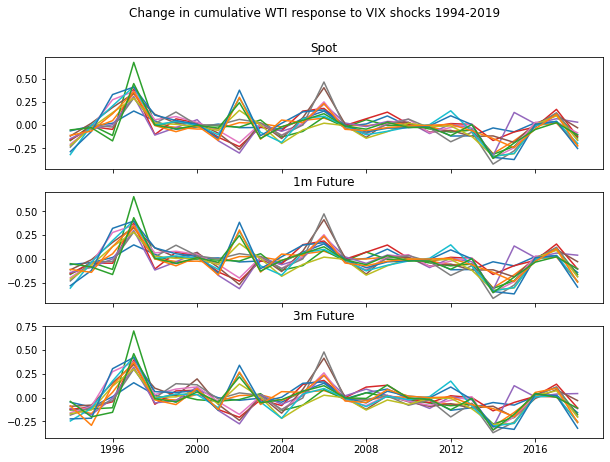

In [20]:
fig, axs = plt.subplots(3, sharex=True, figsize=(10,7))
fig.suptitle('Change in cumulative WTI response to VIX shocks 1994-2019')
axs[0].plot(spot_shift3)
axs[0].set_title('Spot')
axs[1].plot(c1_shift3)
axs[1].set_title('1m Future')
axs[2].plot(c3_shift3)
axs[2].set_title('3m Future')
plt.show()

## 4. Sanity Check

To sanity check my results, I will try to estimate the shape of the overall curve by averaging the coefficients. Since I used time spans close to the entirety of the dataset (leaving around 3 years each side to ensure reasonable sample size for end-of-period estimates), I would expect the estimates to be close to the actual values.

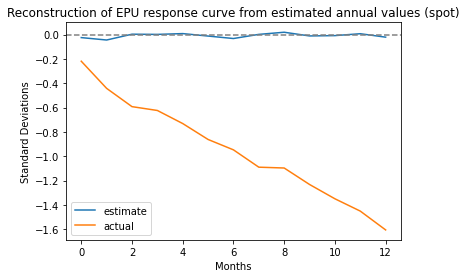

In [21]:
estimate1 = pd.DataFrame({'estimate': [spot_shift1[i].mean() for i in range(13)]})
plt.plot(estimate1, label='estimate')
plt.plot(np.cumsum(model1.params[1:]).reset_index(drop=True), label='actual')
plt.axhline(y=0, linestyle='--', color='grey')
plt.title('Reconstruction of EPU response curve from estimated annual values (spot)')
plt.legend()
plt.ylabel('Standard Deviations')
plt.xlabel('Months')
plt.show()

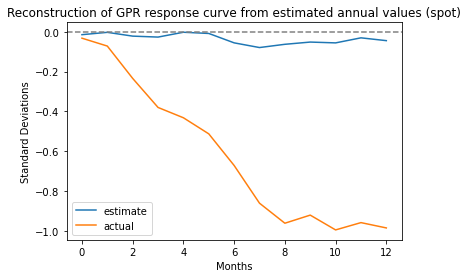

In [22]:
estimate2 = pd.DataFrame({'estimate': [spot_shift2[i].mean() for i in range(13)]})
plt.plot(estimate2, label='estimate')
plt.plot(np.cumsum(model4.params[1:]).reset_index(drop=True), label='actual')
plt.axhline(y=0, linestyle='--', color='grey')
plt.title('Reconstruction of GPR response curve from estimated annual values (spot)')
plt.legend()
plt.ylabel('Standard Deviations')
plt.xlabel('Months')
plt.show()

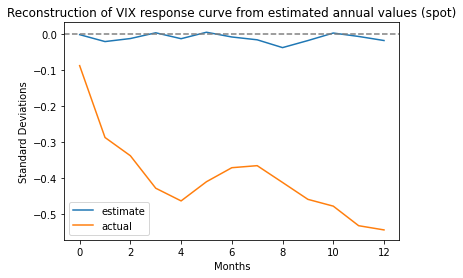

In [23]:
estimate3 = pd.DataFrame({'estimate': [spot_shift3[i].mean() for i in range(13)]})
plt.plot(estimate3, label='estimate')
plt.plot(np.cumsum(model7.params[1:]).reset_index(drop=True), label='actual')
plt.axhline(y=0, linestyle='--', color='grey')
plt.title('Reconstruction of VIX response curve from estimated annual values (spot)')
plt.legend()
plt.ylabel('Standard Deviations')
plt.xlabel('Months')
plt.show()

The estimated annual estimates are nowhere near accurate!